In [1]:
pip install tqdm torch scikit-learn torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
from torchvision import datasets,models
from torchvision.transforms import transforms
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn

In [3]:
if torch.cuda.is_available():
    print("Using GPU")
    device = torch.device("cuda")  
else:
    print("Using CPU")
    device = torch.device("cpu")

Using GPU


In [4]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ]
)

batch_size = 64

In [5]:
train_dataset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True, num_workers=0)

100%|██████████| 170498071/170498071 [00:02<00:00, 62070876.55it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
resnet = models.resnet50(pretrained = True)
resnet.fc = torch.nn.Identity() 
resnet.to(device)
resnet.eval()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 192MB/s] 


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
features = []
with torch.no_grad():
    for img,labels in tqdm(trainloader,desc = "Progess"):
       img = img.to(device)
       output = resnet(img)
       features.append(output.cpu())
       del output
features = torch.cat(features).numpy()

Progess: 100%|██████████| 782/782 [00:23<00:00, 33.09it/s]


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

## Clustering After Dimensionality Reduction

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

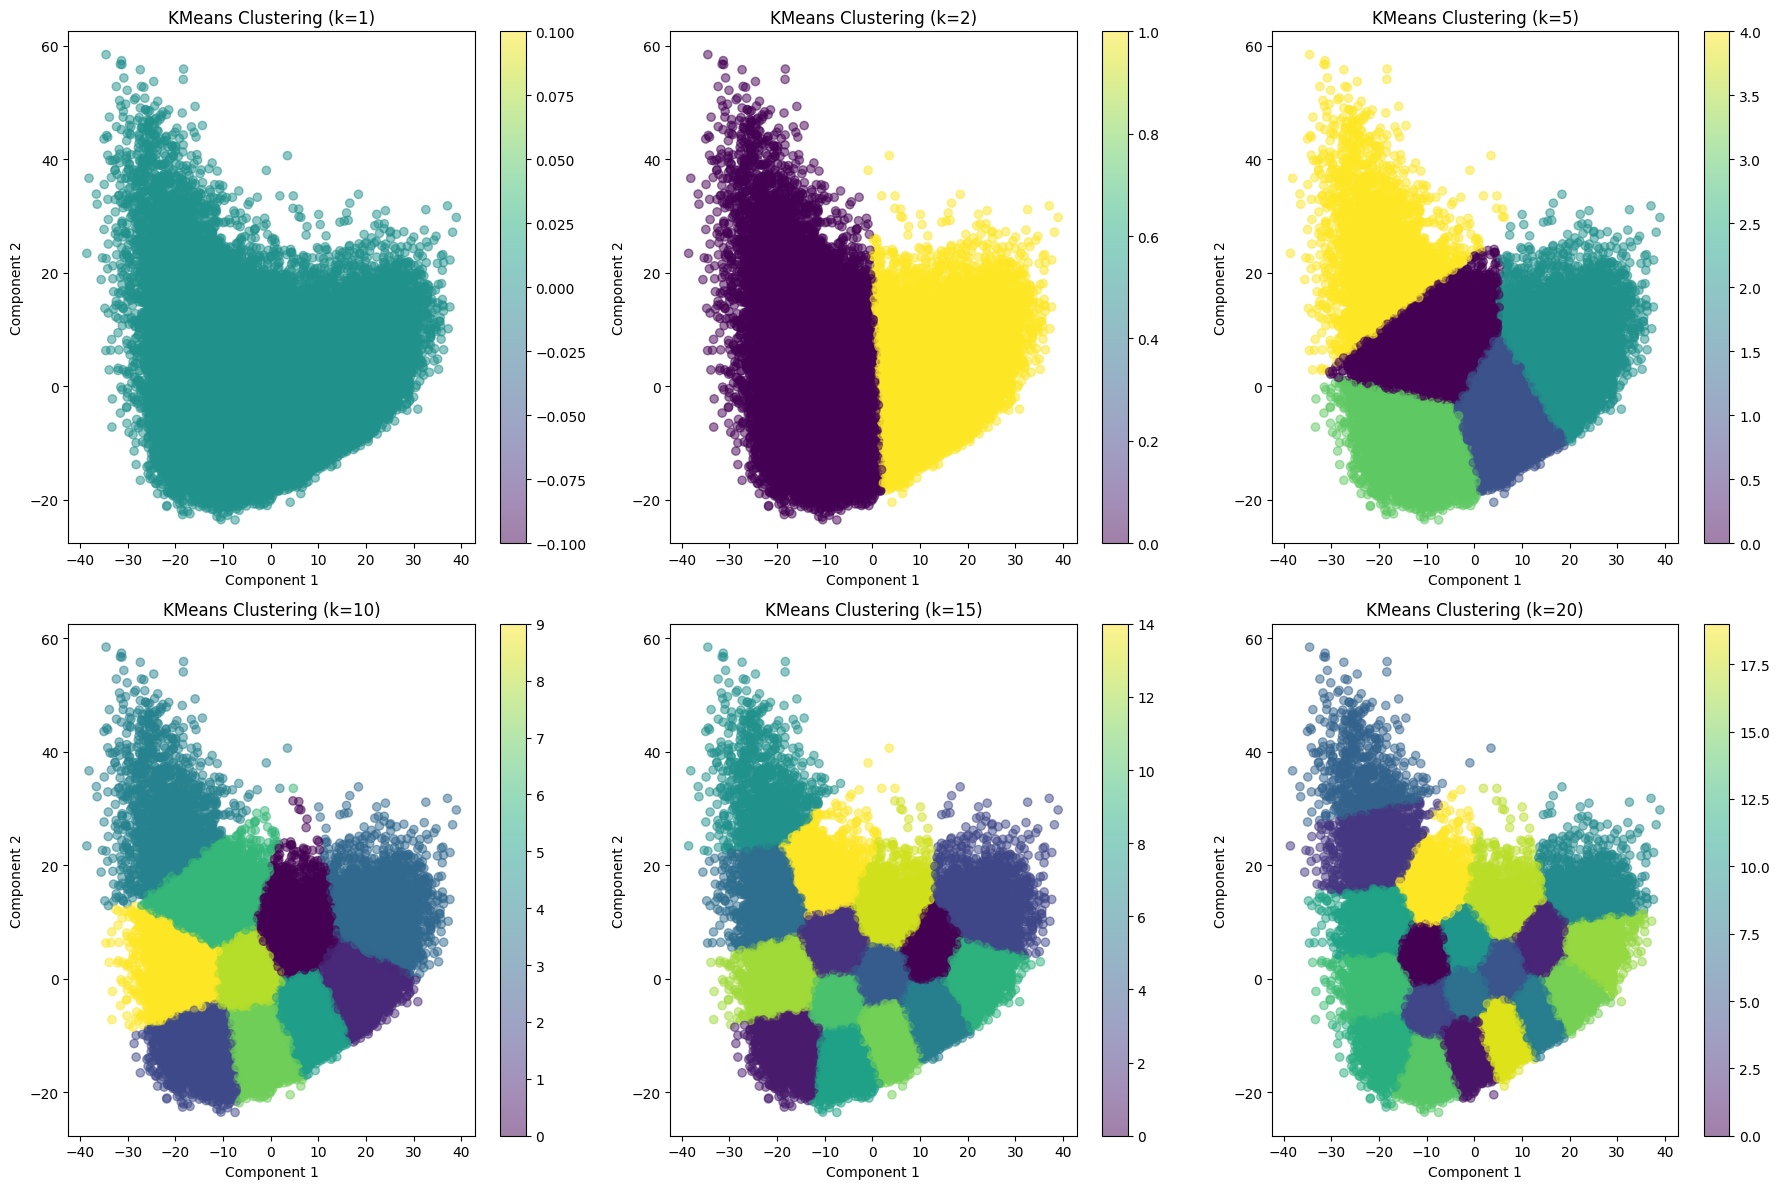

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters = [1, 2, 5, 10, 15, 20]
plt.figure(figsize=(18, 12))
for idx, cluster_num in enumerate(clusters):
    kmeans = KMeans(n_clusters=cluster_num, random_state=42)  
    kmeans.fit(pca_features)
    cluster_labels = kmeans.labels_
    plt.subplot(2,3,idx+1)
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.title(f'KMeans Clustering (k={cluster_num})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.tight_layout()  
plt.show()


## Clustering WithOut Dimensionality Reduction

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

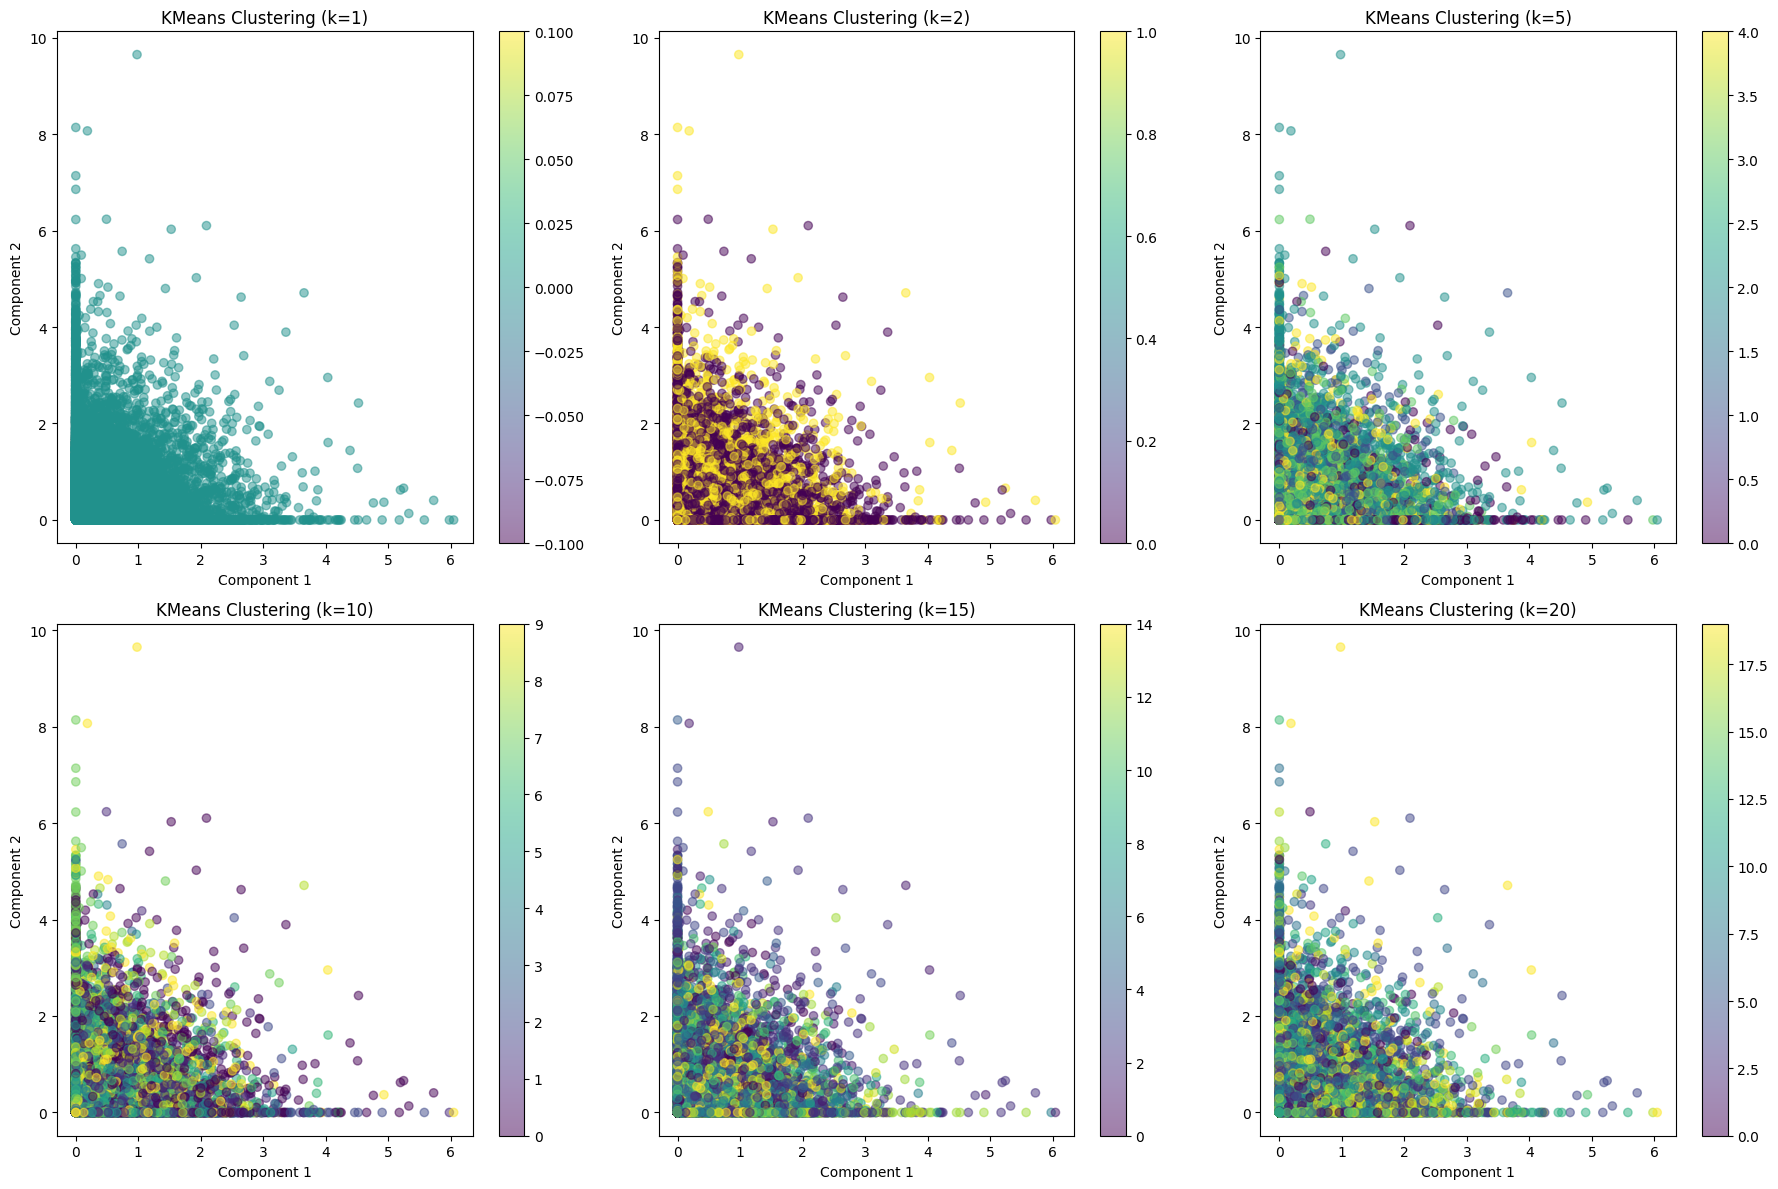

In [10]:
clusters = [1, 2, 5, 10, 15, 20]
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for idx, cluster_num in enumerate(clusters):
    kmeans = KMeans(n_clusters=cluster_num, random_state=42)  
    kmeans.fit(features)
    cluster_labels = kmeans.labels_
    plt.subplot(2,3,idx+1)
    plt.scatter(features[:, 0], features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.title(f'KMeans Clustering (k={cluster_num})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


## KMeans Clustering Without Dimensionality Reduction (PCA)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


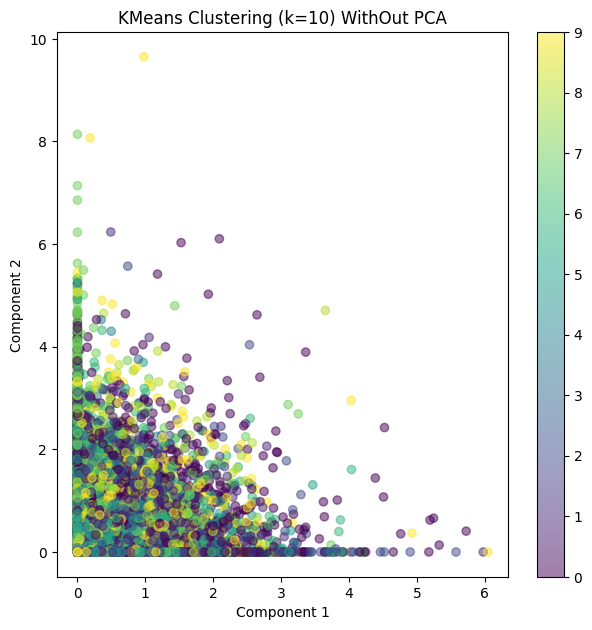




Time Elapsed : 159.20312023162842


In [11]:
import time

start = time.time()
kmeans = KMeans(n_clusters=10, random_state=42)  
kmeans.fit(features)
cluster_labels = kmeans.labels_
plt.figure(figsize=(18, 12))
plt.subplot(2,3,1)
plt.scatter(features[:, 0], features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title(f'KMeans Clustering (k={10}) WithOut PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
end = time.time()
plt.tight_layout()  
plt.show()
print("\n\n")
print("Time Elapsed :" , end-start)


## KMeans Clustering With Dimensionality Reduction (PCA)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


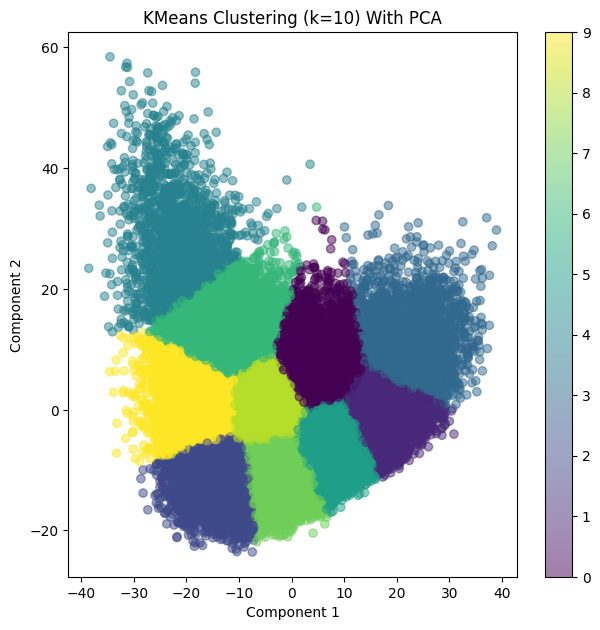




Time Elapsed : 0.8030974864959717


In [12]:
import time

start = time.time()
kmeans = KMeans(n_clusters=10, random_state=42)  
kmeans.fit(pca_features)
cluster_labels = kmeans.labels_
plt.figure(figsize=(18, 12))
plt.subplot(2,3,1)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title(f'KMeans Clustering (k={10}) With PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
end = time.time()
plt.tight_layout()  
plt.show()
print("\n\n")
print("Time Elapsed :" , end-start)
